In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [6]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

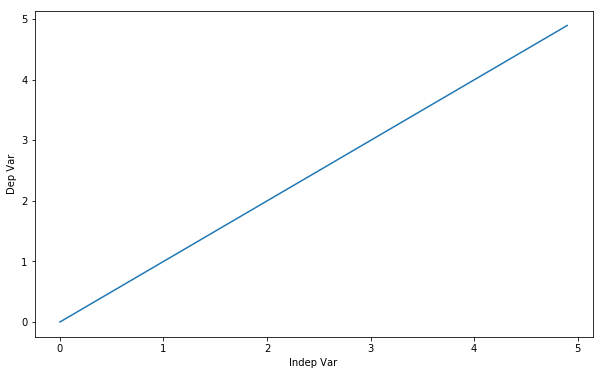

In [8]:
a = 1
b = 0
Y = a*X + b

plt.plot(X,Y)
plt.ylabel('Dep Var')
plt.xlabel('Indep Var')
plt.show()

## Using Tensorflow

In [38]:
x_data = np.random.rand(100).astype(np.float32)

In [39]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [40]:
zip(x_data,y_data)

In [41]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [42]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [43]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [44]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [45]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step,evals)
        train_data.append(evals)

0 [2.5251822, 3.0056643]
5 [2.4085405, 2.3218157]
10 [2.5548027, 2.2461295]
15 [2.6671588, 2.187306]
20 [2.7536852, 2.1420062]
25 [2.82032, 2.1071205]
30 [2.8716357, 2.0802548]
35 [2.9111543, 2.0595653]
40 [2.9415877, 2.0436323]
45 [2.9650247, 2.031362]
50 [2.983074, 2.0219126]
55 [2.9969738, 2.0146358]
60 [3.0076778, 2.0090315]
65 [3.0159214, 2.004716]
70 [3.0222697, 2.0013924]
75 [3.0271585, 1.9988328]
80 [3.0309234, 1.9968617]
85 [3.0338228, 1.9953438]
90 [3.0360556, 1.9941748]
95 [3.037775, 1.9932747]


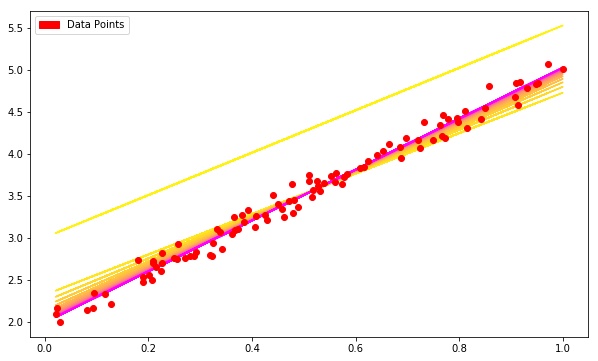

In [49]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line  = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))
    
plt.plot(x_data, y_data, 'ro')

green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.show()